In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/AB_NYC_2019.csv')

In [2]:
df_cleaned = df[['neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
df_cleaned = df_cleaned.fillna(0)

In [3]:
df_cleaned.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
from sklearn.preprocessing import LabelEncoder

#Convert categorical values to labels
df_clean_labeled = pd.concat([df_cleaned.select_dtypes(include='number'),df_cleaned.select_dtypes(include='object').apply(LabelEncoder().fit_transform)],axis=1)   

In [5]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, Lars, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, train_test_split, KFold
from sklearn.metrics import r2_score

X = df_clean_labeled.drop(columns=['price'])
y = df_clean_labeled['price']

models = [
    {'name': 'Linear Regression', 'model': LinearRegression()}
    ,{'name': 'Lasso Regression', 'model': Lasso()}
    ,{'name': 'Ridge Regression', 'model': Ridge()}
    ,{'name': 'ElasticNet Regression', 'model': ElasticNet()}
    ,{'name': 'Lars Regression', 'model': Lars()}
    ,{'name': 'Decision Tree Regressor', 'model': DecisionTreeRegressor(max_depth=4)}
    ,{'name': 'KNeighbors Regression', 'model': KNeighborsRegressor()}
    #,{'name': 'SGD Regression', 'model': SGDRegressor(max_iter = 10000)}
    #,{'name': 'Linear SVR Regression', 'model': LinearSVR()}
]



In [6]:
results = list()
for m in models:
    print("Calculating "+m['name'])
    tr = cross_validate(m['model'], X, y, scoring ='r2', cv = KFold(5), return_train_score = True)
    tr['name'] = m['name']
    results.append(tr)

Calculating Linear Regression
Calculating Lasso Regression
Calculating Ridge Regression
Calculating ElasticNet Regression
Calculating Lars Regression
Calculating Decision Tree Regressor
Calculating KNeighbors Regression


In [7]:
from IPython.display import display, Markdown
import numpy as np

def printResults(r):
    for i in r:
        display(Markdown('## '+i['name']))
        display(Markdown('**Avg Fit Time:** %2.4f '%(np.average(i['fit_time']))))
        display(Markdown('**Avg Test Score:** %2.4f '%(np.average(i['test_score']))))
        display(Markdown('**Avg Train Score:** %2.4f '%(np.average(i['train_score']))))

In [8]:
display(Markdown('# Results Sorted by r2 score'))
printResults(sorted(results, key = lambda r: np.average(r['test_score']),reverse=True))

# Results Sorted by r2 score

## Ridge Regression

**Avg Fit Time:** 0.0194 

**Avg Test Score:** 0.0872 

**Avg Train Score:** 0.0903 

## Linear Regression

**Avg Fit Time:** 0.0815 

**Avg Test Score:** 0.0871 

**Avg Train Score:** 0.0903 

## Lars Regression

**Avg Fit Time:** 0.0215 

**Avg Test Score:** 0.0871 

**Avg Train Score:** 0.0903 

## Lasso Regression

**Avg Fit Time:** 0.0193 

**Avg Test Score:** 0.0775 

**Avg Train Score:** 0.0806 

## ElasticNet Regression

**Avg Fit Time:** 0.0177 

**Avg Test Score:** 0.0502 

**Avg Train Score:** 0.0532 

## Decision Tree Regressor

**Avg Fit Time:** 0.0894 

**Avg Test Score:** -0.0307 

**Avg Train Score:** 0.1752 

## KNeighbors Regression

**Avg Fit Time:** 0.1637 

**Avg Test Score:** -0.1197 

**Avg Train Score:** 0.3012 

In [9]:
from sklearn.model_selection import GridSearchCV

KNeighborsGrid = GridSearchCV(KNeighborsRegressor(), {'n_neighbors':[5, 10, 20, 50]}, scoring = 'r2', return_train_score = True, cv=KFold(5)).fit(X,y)
DecisionTreeGrid = GridSearchCV(DecisionTreeRegressor(), {'max_depth':[4, 8, 12, 24]}, scoring = 'r2', return_train_score = True, cv=KFold(5)).fit(X,y)

display(Markdown('# Hyperparameter Tuning'))

display(Markdown('## KNeighbors Grid Search Results'))
display(Markdown('**Best Params:** %s '%KNeighborsGrid.best_params_))
display(Markdown('**Best Score:** %s '%KNeighborsGrid.best_score_))

display(Markdown('## Desicion Tree Grid Search Results'))
display(Markdown('**Best Params:** %s '%DecisionTreeGrid.best_params_))
display(Markdown('**Best Score:** %s '%DecisionTreeGrid.best_score_))

# Hyperparameter Tuning

## KNeighbors Grid Search Results

**Best Params:** {'n_neighbors': 50} 

**Best Score:** 0.032899972545914855 

## Desicion Tree Grid Search Results

**Best Params:** {'max_depth': 4} 

**Best Score:** -0.0307210273265369 

# Reduce and scale data and refit models
1. Remove price outliers (90th percentile) and long term rentals
1. Scale numeric columns -> price, minimum nights, number of reviews and availability

In [10]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

df_reduced = df_clean_labeled[(df_clean_labeled['price']<355) & (df_clean_labeled['minimum_nights']<14)].copy()
df_reduced = df_reduced.drop(labels=['latitude', 'longitude'], axis=1)
scaled_columns = ['price','minimum_nights','number_of_reviews', 'availability_365']
df_reduced[scaled_columns] = robust_scale(df_reduced[scaled_columns])
                        

In [11]:
X = df_reduced.drop(columns=['price'])
y = df_reduced['price']

new_models = [
    {'name': 'Linear Regression', 'model': LinearRegression()}
    ,{'name': 'Lasso Regression', 'model': Lasso()}
    ,{'name': 'Ridge Regression', 'model': Ridge()}
    ,{'name': 'ElasticNet Regression', 'model': ElasticNet()}
    ,{'name': 'Lars Regression', 'model': Lars()}
    ,{'name': 'Decision Tree Regressor', 'model': DecisionTreeRegressor(max_depth=4)}
    ,{'name': 'KNeighbors Regression', 'model': KNeighborsRegressor()}
    #,{'name': 'SGD Regression', 'model': SGDRegressor(max_iter = 10000)}
    #,{'name': 'Linear SVR Regression', 'model': LinearSVR()}
]

new_results = list()
for m in new_models:
    print("Calculating "+m['name'])
    tr = cross_validate(m['model'], X, y, scoring ='r2', cv = KFold(5), return_train_score = True)
    tr['name'] = m['name']
    new_results.append(tr)
    
display(Markdown('# Results Sorted by r2 score'))
printResults(sorted(new_results, key = lambda r: np.average(r['test_score']),reverse=True))

Calculating Linear Regression
Calculating Lasso Regression
Calculating Ridge Regression
Calculating ElasticNet Regression
Calculating Lars Regression
Calculating Decision Tree Regressor
Calculating KNeighbors Regression


# Results Sorted by r2 score

## Decision Tree Regressor

**Avg Fit Time:** 0.0408 

**Avg Test Score:** 0.4357 

**Avg Train Score:** 0.4550 

## Ridge Regression

**Avg Fit Time:** 0.0097 

**Avg Test Score:** 0.3615 

**Avg Train Score:** 0.3756 

## Lars Regression

**Avg Fit Time:** 0.0115 

**Avg Test Score:** 0.3615 

**Avg Train Score:** 0.3756 

## Linear Regression

**Avg Fit Time:** 0.0131 

**Avg Test Score:** 0.3615 

**Avg Train Score:** 0.3756 

## KNeighbors Regression

**Avg Fit Time:** 0.5641 

**Avg Test Score:** 0.3475 

**Avg Train Score:** 0.6087 

## Lasso Regression

**Avg Fit Time:** 0.0104 

**Avg Test Score:** 0.0021 

**Avg Train Score:** 0.0189 

## ElasticNet Regression

**Avg Fit Time:** 0.0094 

**Avg Test Score:** 0.0020 

**Avg Train Score:** 0.0213 

Significant improvement on both test and train scores was achieved with both measures

In [13]:
from sklearn.model_selection import GridSearchCV

DecisionTreeGrid = GridSearchCV(DecisionTreeRegressor(), {'max_depth':[4, 8, 12, 24, 48]}, return_train_score = True, cv=KFold(5)).fit(X,y)

display(Markdown('# Hyperparameter Tuning'))

display(Markdown('## Desicion Tree Grid Search Results'))
display(Markdown('**Best Params:** %s '%DecisionTreeGrid.best_params_))
display(Markdown('**Best Score:** %s '%DecisionTreeGrid.best_score_))

# Hyperparameter Tuning

## Desicion Tree Grid Search Results

**Best Params:** {'max_depth': 8} 

**Best Score:** 0.4534332651255103 

Text(0.5, 1.0, 'Model scores')

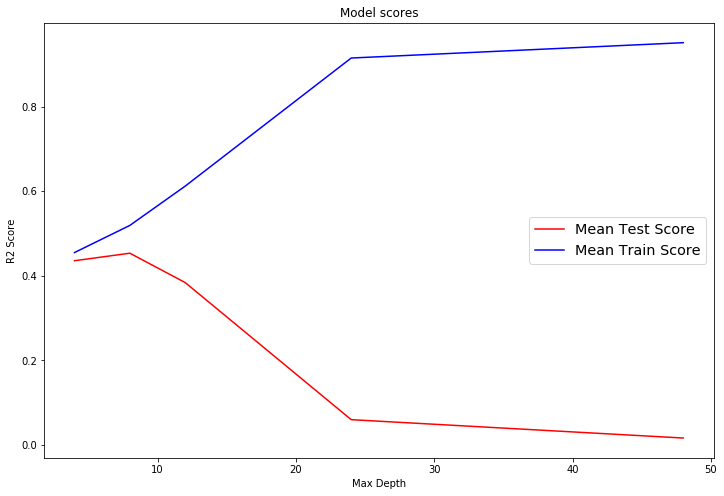

In [14]:
params = [4, 8, 12, 24, 48]
plt.figure(figsize=(12,8))
plt.plot(params, DecisionTreeGrid.cv_results_['mean_test_score'], label = 'Mean Test Score', color = 'red')
plt.plot(params, DecisionTreeGrid.cv_results_['mean_train_score'], label = 'Mean Train Score', color = 'blue')
plt.legend(loc='right', fontsize= 'x-large')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Model scores')


# Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
RFR = RandomForestRegressor(n_estimators = 600, bootstrap= True, oob_score=True).fit(X_train,y_train)

In [18]:
display(Markdown('## Feature Importances'))
important_features = pd.Series(RFR.feature_importances_, index = X.columns).sort_values(ascending=False)
display(Markdown(important_features.to_markdown()))
display(Markdown('## R2 Score'))
display(Markdown(str(RFR.score(X_test,y_test))))

## Feature Importances

|                                |         0 |
|:-------------------------------|----------:|
| room_type                      | 0.380654  |
| reviews_per_month              | 0.124221  |
| neighbourhood                  | 0.115374  |
| availability_365               | 0.115131  |
| number_of_reviews              | 0.0918027 |
| neighbourhood_group            | 0.070124  |
| minimum_nights                 | 0.0632912 |
| calculated_host_listings_count | 0.0394022 |

## R2 Score

0.48510614952672976

In [ ]:
version(pandas)

In [ ]:
print(pd.__version__)